In [20]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import bmcs_utils.api as bu
from bmcs_cross_section.api import MKappa, TShape, EC2, BarLayer, ReinfLayer, MKappaParamsStudy
from bmcs_beam.api import BoundaryConditions, BoundaryConfig, DeflectionProfile, LoadDeflectionParamsStudy, BeamDesign, SimpleDistLoadSystem, CantileverDistLoadSystem

## Moment-curvature (cross-section level)

In [3]:
mc = MKappa(low_kappa = 0, high_kappa = 0.00006)

bl1 = ReinfLayer(z=20, A=6*np.pi*8**2, matmod='steel')
bl1.matmod_.trait_set(E=200000, f_sy=400)
mc.cross_section_layout.add_layer(bl1)

mc.interact()

## Load-deflection (beam level)

In [4]:
dp = DeflectionProfile(mc = mc)
dp.interact()

In [4]:
mc = MKappa(low_kappa = 0, high_kappa = 0.00006)

bl1 = ReinfLayer(z=20, A=6*np.pi*8**2, matmod='steel')
bl1.matmod_.trait_set(E=200000, f_sy=400)
mc.cross_section_layout.add_layer(bl1)

bl2 = ReinfLayer(z=40, A=2*np.pi*8**2, matmod='carbon')
bl2.matmod_.trait_set(E=160000, f_t=1890)
mc.cross_section_layout.add_layer(bl2)

mc.cs_design.matrix= 'EC2'
# mc.cs_design.matrix= 'EC2 with plateau'
# mc.cs_design.matrix_.trait_set(f_cm = 30, factor=1)

dp = DeflectionProfile(mc = mc)
dp.beam_design.system_.L = 3000

# dp.beam_design.system = 'simple_beam_dist_load'
# dp.beam_design.system = 'cantilever_dist_load'
dp.beam_design.system = '3pb'

dp.interact()

## Parametric study

Parametric study is running...
L: (3000), (5000), (6000), 
Parametric study finished.


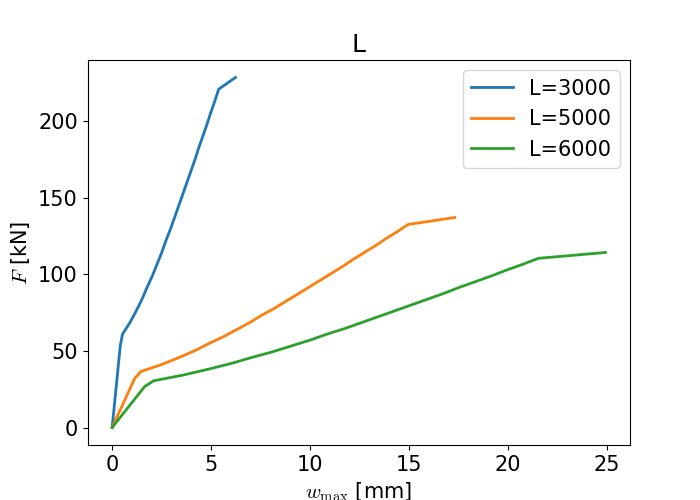

In [31]:
ps = LoadDeflectionParamsStudy(dp)
params_config = [
        ['L', dp.beam_design.system_, [3000, 5000, 6000]],
]
ps.run(params_config)
pass